MDS oder Isomap, Dann Clustering (K-Means etc): Human Activity Recognition, dann Validieren

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("../data/human_activity_recognition.csv")

train, test = train_test_split(data, test_size=0.3, random_state=42)

data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


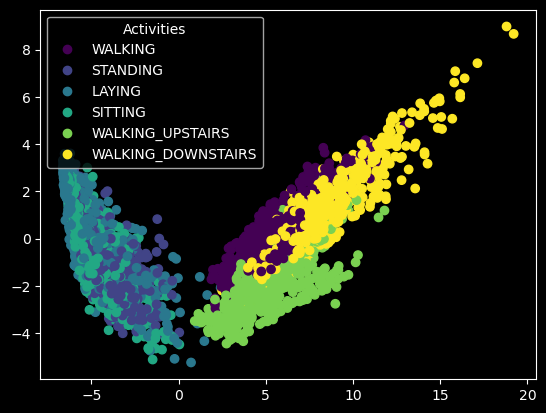

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

motion_data = data.drop(columns=["subject", "Activity"])

reduce = PCA(n_components=2).fit_transform(motion_data)

unique_activities = list(set(data["Activity"]))
colors = data["Activity"].apply(lambda x : unique_activities.indereduce_cheap(reduce_cheap))

scatter = plt.scatter(reduce[:, 0], reduce[:, 1], c=colors)
handles, _ = scatter.legend_elements()
plt.legend(handles, unique_activities, title="Activities")

In [28]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt 


reduce_mds = MDS(n_components=2,  n_init=1).fit_transform(motion_data)


scatter = plt.scatter(reduce_mds[:, 0], reduce_mds[:, 1], c=colors)
handles, _ = scatter.legend_elements()
plt.legend(handles, unique_activities, title="Activities")

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


KeyboardInterrupt: 

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


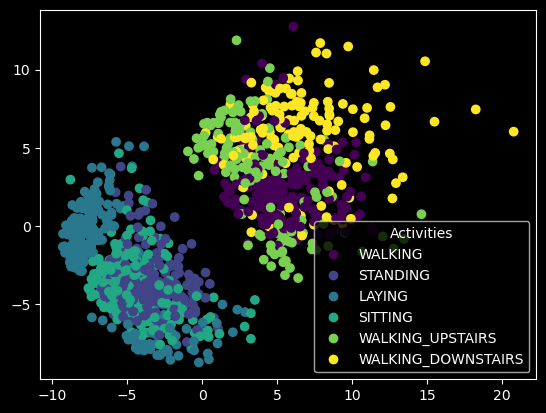

In [19]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

less_data = data.sample(1000, random_state=42) # performance-gründe
less_motion_data = less_data.drop(columns=["subject", "Activity"])


less_unique_activities = list(set(less_data["Activity"]))
less_colors = less_data["Activity"].apply(lambda x : unique_activities.index(x))


#reduce_10 = PCA(n_components=15, random_state=42).fit_transform(less_motion_data)
reduce_cheap = MDS(n_components=2, n_jobs=-1, random_state=42).fit_transform(less_motion_data)
scatter = plt.scatter(reduce_cheap[:, 0], reduce_cheap[:, 1], c=less_colors)
handles, _ = scatter.legend_elements()
plt.legend(handles, less_unique_activities, title="Activities")


# Fazit: MDS ist hier schlechter, weil es keine topologischen Zusammenhänge gibt!

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


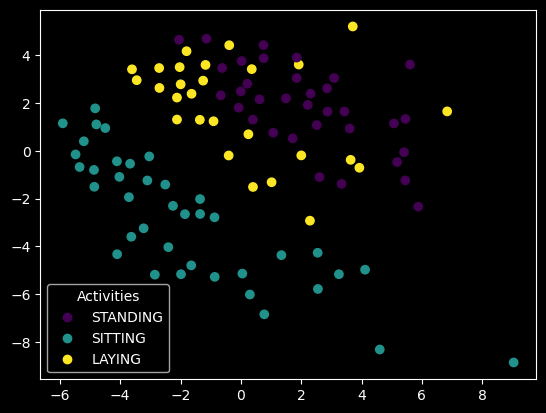

In [ ]:
less_data = data[data["Activity"].apply(lambda s : s in ["LAYING", "STANDING", "SITTING"])].sample(100, random_state=42)
less_motion_data = less_data.drop(columns=["subject", "Activity"])


less_unique_activities = list(set(less_data["Activity"]))
less_colors = less_data["Activity"].apply(lambda x : unique_activities.index(x))

#reduce_10 = PCA(n_components=15, random_state=42).fit_transform(less_motion_data)
reduce_cheap = MDS(n_components=2, n_jobs=-1, random_state=42).fit_transform(less_motion_data)
scatter = plt.scatter(reduce_cheap[:, 0], reduce_cheap[:, 1], c=less_colors)
handles, _ = scatter.legend_elements()
plt.legend(handles, less_unique_activities, title="Activities")

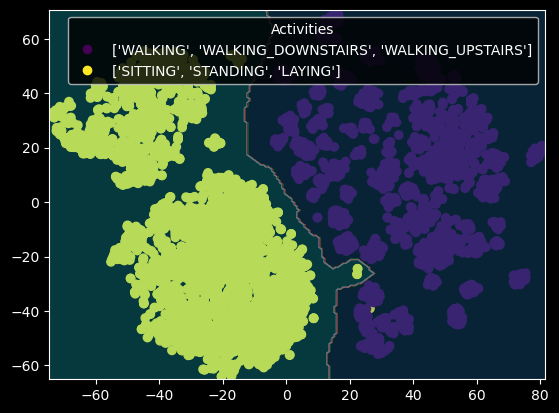

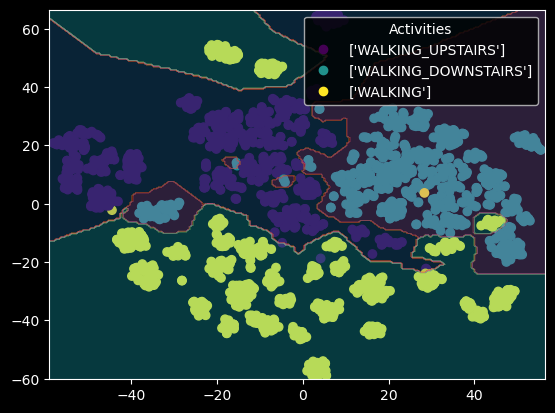

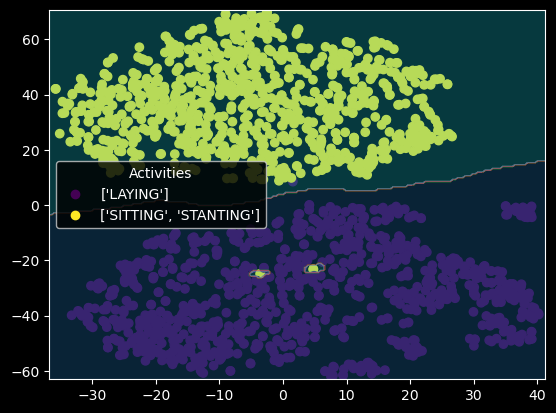

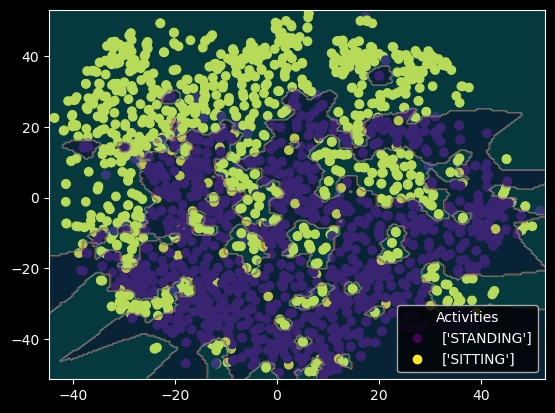

In [ ]:
from sklearn.manifold import Isomap, TSNE, SpectralEmbedding
from sklearn.decomposition import KernelPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
import numpy as np

# should return 2 clusters
# options must be disjoint
def visualize_decision(options, method="mds", show=True, samples=1000):
    less_data = train[train["Activity"].apply(lambda s : s in sum(options, []))]#.sample(samples, random_state=42)
    less_motion_data = less_data.drop(columns=["subject", "Activity"])
    reduce_cheap = []
    reducer = 0
    if method == "mds":
        reducer = MDS(n_components=2, n_jobs=-1, random_state=42, n_init=10, eps=1e-10)
    elif method == "pca":
        reducer = PCA(n_components=2, random_state=42)
    elif method == "isomap":
        reducer = Isomap(n_components=2)
    elif method == "tsne":
        reducer = TSNE(n_components=2, random_state=42)
    elif method == "kernelpca":
        reducer = KernelPCA(n_components=2, random_state=42)
    elif method == "spectral":
        reducer = SpectralEmbedding(n_components=2, random_state=42)

    reduce_cheap = reducer.fit_transform(less_motion_data)

    def get_color(s):
        for o in options:
            if s in o:
                return str(o)
        return ValueError("???")

    labels = less_data["Activity"].apply(get_color)

    if show:
        unique_labels = list(set(labels))
        colors = labels.apply(lambda x : unique_labels.index(x))
        scatter = plt.scatter(reduce_cheap[:, 0], reduce_cheap[:, 1], c=colors)
        handles, _ = scatter.legend_elements()
        
        plt.legend(handles, unique_labels, title="Activities")


    clf = KNeighborsClassifier(n_neighbors=3).fit(reduce_cheap, labels)

    if not show:
        nn = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=600, random_state=42)
        nn.fit(less_motion_data, reduce_cheap)

        return (reducer, clf, nn)

    x_min, x_max = reduce_cheap[:, 0].min() - 1, reduce_cheap[:, 0].max() + 1
    y_min, y_max = reduce_cheap[:, 1].min() - 1, reduce_cheap[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                        np.linspace(y_min, y_max, 200))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape) 
    colors_z = np.vectorize(lambda a: list(unique_labels).index(a))(Z)
    plt.contourf(xx, yy, colors_z, alpha=0.3, cmap="tab10")

    plt.show()

# TSNE ist fancy
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE
# https://de.wikipedia.org/wiki/Kullback-Leibler-Divergenz
method = "tsne"
visualize_decision([["SITTING", "STANDING", "LAYING"], ["WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]], method=method)
visualize_decision([["WALKING"], ["WALKING_DOWNSTAIRS"], ["WALKING_UPSTAIRS"]], method=method)
visualize_decision([["LAYING"], ["SITTING", "STANTING"]], method=method)
visualize_decision([["SITTING"], ["STANDING"]], method=method)

In [134]:
reducer1, clf1, nn1 = visualize_decision(
    [["SITTING", "STANDING", "LAYING"],
     ["WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]],
    method="tsne", show=False
)

reducer2, clf2, nn2 = visualize_decision(
    [["WALKING"], ["WALKING_DOWNSTAIRS"], ["WALKING_UPSTAIRS"]],
    method="tsne", show=False
)

reducer3, clf3, nn3 = visualize_decision(
    [["LAYING"], ["SITTING", "STANDING"]],
    method="tsne", show=False
)

reducer4, clf4, nn4 = visualize_decision(
    [["SITTING"], ["STANDING"]],
    method="tsne", show=False
)

def decide_activity(sample):
    reduced = nn1.predict([sample])
    group1 = clf1.predict(reduced)[0]

    if "WALKING" in group1:
        reduced = nn2.predict([sample])
        return clf2.predict(reduced)[0]

    else:
        reduced = nn3.predict([sample])
        group2 = clf3.predict(reduced)[0]

        if "LAYING" in group2:
            return "LAYING"
        else:
            reduced = nn4.predict([sample])
            return clf4.predict(reduced)[0]

In [ ]:
test_movement = test.drop(columns=["subject", "Activity"])#, "prediction","Pred_Activity", "Correct"
test["prediction"] = test_movement.apply(decide_activity, axis=1)

In [137]:
test["Pred_Activity"] = test["prediction"].apply(lambda s : s.removeprefix("['").removesuffix("']"))
test["Correct"] = test["Pred_Activity"] == test["Activity"]
test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,prediction,Pred_Activity,Correct
4525,0.283203,-0.047024,-0.168986,0.384949,0.176898,-0.310332,0.381757,0.122611,-0.332984,0.465563,...,0.258975,-0.854858,-0.784330,0.222960,-0.066506,22,WALKING_DOWNSTAIRS,['WALKING_DOWNSTAIRS'],WALKING_DOWNSTAIRS,True
1446,0.256904,-0.036623,-0.133856,0.201409,-0.154142,0.344183,0.092771,-0.182114,0.291899,0.586004,...,0.942947,-0.567147,-0.665156,0.178975,0.243362,7,WALKING_DOWNSTAIRS,['WALKING_DOWNSTAIRS'],WALKING_DOWNSTAIRS,True
5995,0.291316,-0.001065,-0.072461,-0.336609,-0.279162,-0.303323,-0.381421,-0.253026,-0.337381,0.074430,...,-0.680774,0.161405,-0.857202,0.192929,0.046716,27,WALKING,['WALKING'],WALKING,True
4222,0.276116,-0.010909,-0.102886,-0.992196,-0.982169,-0.981127,-0.992838,-0.981366,-0.979864,-0.931924,...,0.176515,-0.143818,-0.625215,-0.106678,-0.147469,21,SITTING,['SITTING'],SITTING,True
6754,0.256382,0.000428,-0.113664,0.075014,0.046502,-0.369482,-0.024794,-0.085337,-0.385018,0.562230,...,0.831084,0.465453,-0.860617,0.150598,-0.067109,29,WALKING_DOWNSTAIRS,['WALKING_DOWNSTAIRS'],WALKING_DOWNSTAIRS,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,0.277759,-0.016751,-0.109404,-0.972743,-0.989584,-0.984029,-0.971697,-0.989688,-0.984190,-0.925315,...,0.880022,-0.813216,0.409798,-0.340982,-0.648112,21,LAYING,LAYING,LAYING,True
3007,0.442470,-0.020738,-0.093847,0.005989,-0.252665,-0.093379,-0.022354,-0.211783,-0.167991,0.173022,...,0.941924,-0.717911,-0.692420,0.229592,0.190166,16,WALKING_DOWNSTAIRS,['WALKING_UPSTAIRS'],WALKING_UPSTAIRS,False
6021,0.329342,-0.023175,-0.128310,0.161700,-0.223178,-0.391785,0.124093,-0.314098,-0.451914,0.375493,...,0.900523,-0.746152,-0.883953,0.176293,0.037084,27,WALKING_DOWNSTAIRS,['WALKING_DOWNSTAIRS'],WALKING_DOWNSTAIRS,True
4945,0.081373,-0.046053,-0.052097,-0.807613,-0.909446,-0.832633,-0.818421,-0.931386,-0.843280,-0.906991,...,-0.385435,0.540447,0.500926,-0.276342,-0.732925,23,LAYING,LAYING,LAYING,True


In [170]:
num_correct = test[test["Correct"] == True].count()[0]
num_incorrect = test[test["Correct"] == False].count()[0]
print("The Test is", num_correct / (num_incorrect + num_correct) * 100, "% correct in determining Human Activity")

condition_correct = (
    ((test["Activity"] == "SITTING") | (test["Activity"] == "STANDING")) &
    ((test["Pred_Activity"] == "SITTING") | (test["Pred_Activity"] == "STANDING"))
)

condition_incorrect = (
    ((test["Activity"] == "SITTING") | (test["Activity"] == "STANDING")) &
    ~((test["Pred_Activity"] == "SITTING") | (test["Pred_Activity"] == "STANDING"))
)

num_correct = test[condition_correct].shape[0]
num_incorrect = test[condition_incorrect].shape[0]

print("The Test is", num_correct / (num_incorrect + num_correct) * 100, "% correct in determining if the subject is standing or sitting (not deciding which)")

condition_correct = (
    ((test["Activity"] == "SITTING") & (test["Pred_Activity"] == "SITTING")) |
    ((test["Activity"] == "STANDING") & (test["Pred_Activity"] == "STANDING"))
)

condition_incorrect = (
((test["Activity"] == "SITTING") & (test["Pred_Activity"] == "STANDING")) |
    ((test["Activity"] == "STANDING") & (test["Pred_Activity"] == "SITTING"))
)

num_correct = test[condition_correct].shape[0]
num_incorrect = test[condition_incorrect].shape[0]

print("The Test is", num_correct / (num_incorrect + num_correct) * 100, "% correct in deciding between standing and sitting")



The Test is 53.98912058023571 % correct in determining Human Activity
The Test is 99.62358845671268 % correct in determining if the subject is standing or sitting (not deciding which)
The Test is 69.39546599496221 % correct in deciding between standing and sitting


In [157]:
# What about a Straight-Forward ML Approach?

train_motion = train.drop(columns=["subject", "Activity"])
labels = list(set(train["Activity"]))

train_labels =  train["Activity"].apply(lambda s : labels.index(s))

nn = MLPRegressor(hidden_layer_sizes=100, max_iter=600, random_state=42)
nn.fit(train_motion, train_labels)

MLPRegressor(hidden_layer_sizes=100, max_iter=600, random_state=42)

In [ ]:
test_movement = test.drop(columns=["subject", "Activity", "prediction","Pred_Activity", "Correct", "ML_Activity"])#, "prediction","Pred_Activity", "Correct"
test["ML_Activity"] = test_movement.apply(lambda row : labels[int(nn.predict(row.to_numpy().reshape(1, -1)))], axis=1)
test

In [169]:
test["Correct"] = test["ML_Activity"] == test["Activity"]

num_correct = test[test["Correct"] == True].count()[0]
num_incorrect = test[test["Correct"] == False].count()[0]
print("The ML Test is", num_correct / (num_incorrect + num_correct) * 100, "% correct in determining Human Activity")

condition_correct = (
    ((test["Activity"] == "SITTING") | (test["Activity"] == "STANDING")) &
    ((test["ML_Activity"] == "SITTING") | (test["ML_Activity"] == "STANDING"))
)

condition_incorrect = (
    ((test["Activity"] == "SITTING") | (test["Activity"] == "STANDING")) &
    ~((test["ML_Activity"] == "SITTING") | (test["ML_Activity"] == "STANDING"))
)

num_correct = test[condition_correct].shape[0]
num_incorrect = test[condition_incorrect].shape[0]

print("The ML Test is", num_correct / (num_incorrect + num_correct) * 100, "% correct in determining if the subject is standing or sitting (not deciding which)")

condition_correct = (
    ((test["Activity"] == "SITTING") & (test["ML_Activity"] == "SITTING")) |
    ((test["Activity"] == "STANDING") & (test["ML_Activity"] == "STANDING"))
)

condition_incorrect = (
((test["Activity"] == "SITTING") & (test["ML_Activity"] == "STANDING")) |
    ((test["Activity"] == "STANDING") & (test["ML_Activity"] == "SITTING"))
)

num_correct = test[condition_correct].shape[0]
num_incorrect = test[condition_incorrect].shape[0]

print("The ML Test is", num_correct / (num_incorrect + num_correct) * 100, "% correct in deciding between standing and sitting")

print("Therefor our wierd custom approach was better...")

The ML Test is 53.98912058023571 % correct in determining Human Activity
The ML Test is 47.67879548306148 % correct in determining if the subject is standing or sitting (not deciding which)
The ML Test is 96.3157894736842 % correct in deciding between standing and sitting
Therefor our wierd custom approach was better...


Although, if we integrate the last decision into our tree, we would see a significant improvement